In [87]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [88]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Uber dataset.csv")
z

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [89]:
z.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [90]:
z.shape

(209673, 8)

In [91]:
z.size

1677384

In [92]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [93]:
z.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [94]:
def change_string(a):
    if(a == 1):
        return("Yes")
    else:
        return("No")

In [95]:
z["surge_applied"] = z["surge_applied"].apply(change_string)

In [96]:
z["surge_applied"] = z["surge_applied"].astype(str)

<Axes: title={'center': 'surge_applied vs total_fare'}, xlabel='surge_applied', ylabel='total_fare'>

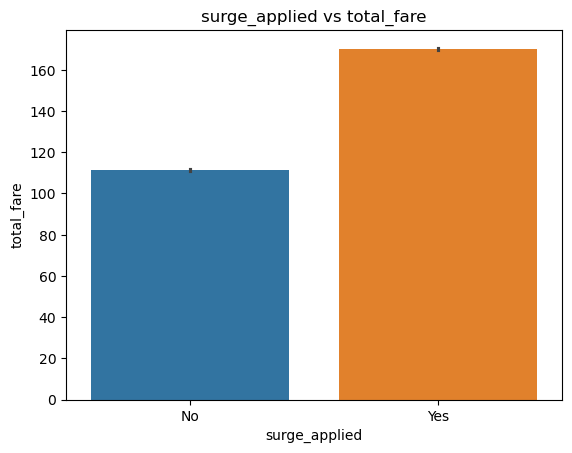

In [97]:
plt.title("surge_applied vs total_fare")
sns.barplot(x = z["surge_applied"], y = z["total_fare"], data = z, hue = z["surge_applied"])

In [98]:
b = z.copy()
b.drop(["surge_applied"], axis = 1, inplace = True)
b

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
0,748.0,2.75,1.0,75.00,24,6.300,105.300
1,1187.0,3.43,1.0,105.00,24,13.200,142.200
2,730.0,3.12,1.0,71.25,0,26.625,97.875
3,671.0,5.63,3.0,90.00,0,9.750,99.750
4,329.0,2.09,1.0,45.00,12,13.200,70.200
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800
209669,438.0,1.29,1.0,48.75,12,34.575,95.325
209670,571.0,2.82,1.0,63.75,0,6.000,69.750
209671,491.0,2.16,1.0,56.25,0,13.500,69.750


In [99]:
b.corr()["total_fare"].sort_values(ascending = False)

total_fare            1.000000
fare                  0.966748
tip                   0.508639
miscellaneous_fees    0.452568
trip_duration         0.142159
distance_traveled     0.036677
num_of_passengers     0.014234
Name: total_fare, dtype: float64

<Axes: >

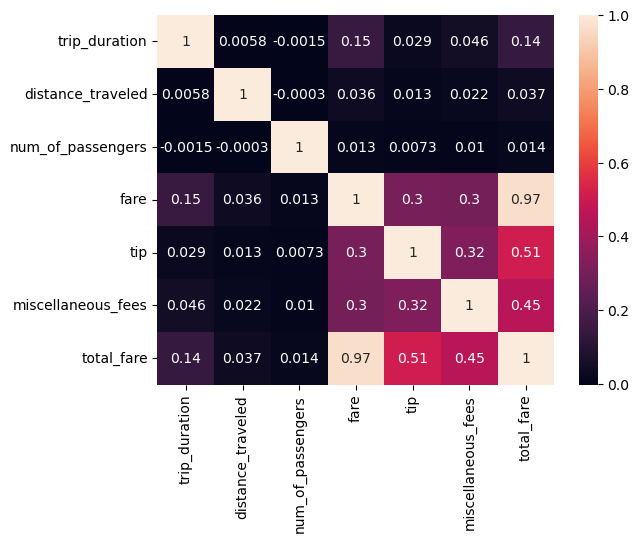

In [100]:
sns.heatmap(b.corr(), annot = True)

In [101]:
z.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [102]:
z5 = z.groupby(["surge_applied"])["num_of_passengers"].count()

In [103]:
pd.DataFrame(z5)

,num_of_passengers
surge_applied,
No,150855
Yes,58818


In [104]:
z.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

<Axes: xlabel='fare', ylabel='total_fare'>

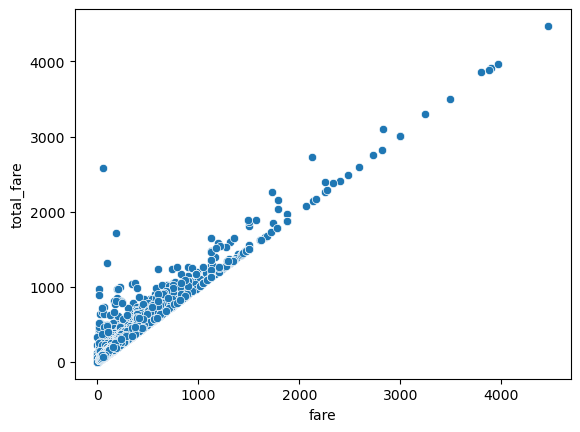

In [105]:
sns.scatterplot(x = z["fare"], y = z["total_fare"], data = z)

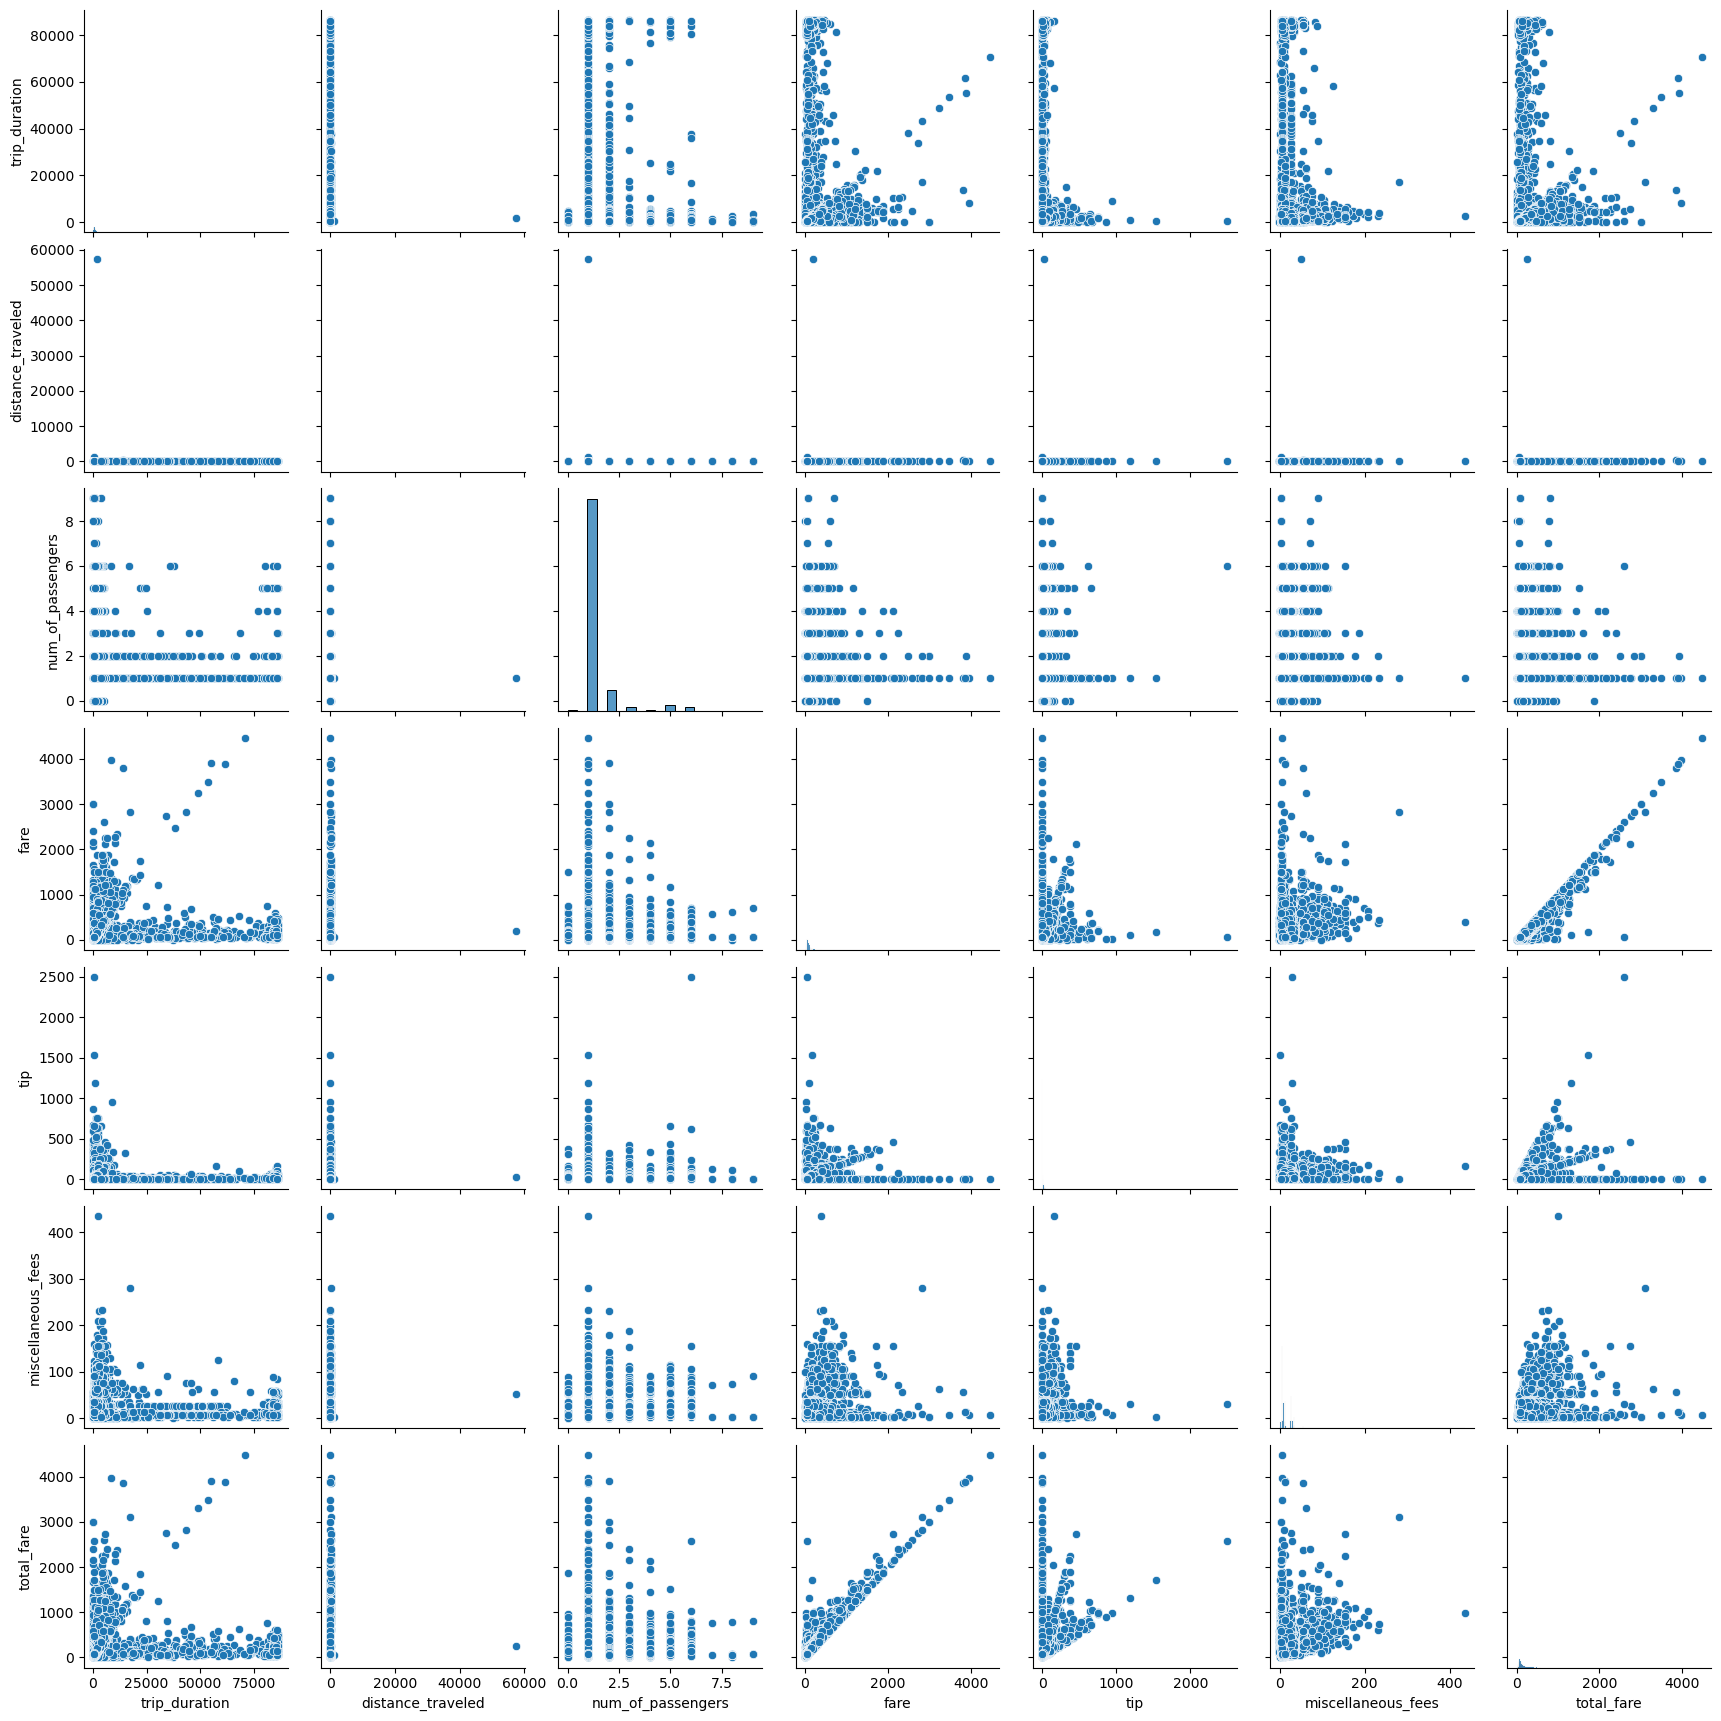

In [106]:
sns.pairplot(z)

In [107]:
z.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

<Axes: xlabel='fare', ylabel='total_fare'>

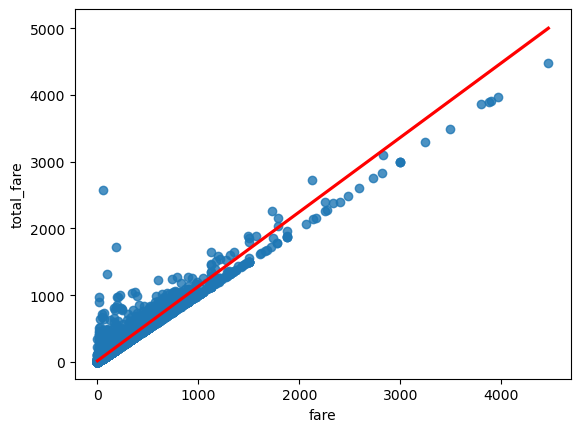

In [108]:
sns.regplot(x = z["fare"], y = z["total_fare"], data = z, line_kws = {"color" : "red"})

In [109]:
x = z[["fare", "total_fare"]]

In [110]:
X = x
Y = x["total_fare"]

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [112]:
x_train = x_train.drop(["total_fare"], axis = 1)
x_test = x_test.drop(["total_fare"], axis = 1)

In [113]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [114]:
n = LinearRegression()
n.fit(x_train,y_train)

LinearRegression()

In [115]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [116]:
round(r2_train, 2)*100

93.0

In [117]:
n = LinearRegression()
n.fit(x_test, y_test)

LinearRegression()

In [118]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [119]:
round(r2_test, 2)*100

93.0

In [120]:
res_train = y_train - y_predict_train

In [121]:
res_train

array([[-15.55867891],
       [-12.45181161],
       [-14.64898076],
       ...,
       [ -4.79163123],
       [-16.36319758],
       [ -0.45229385]])

<Axes: ylabel='Density'>

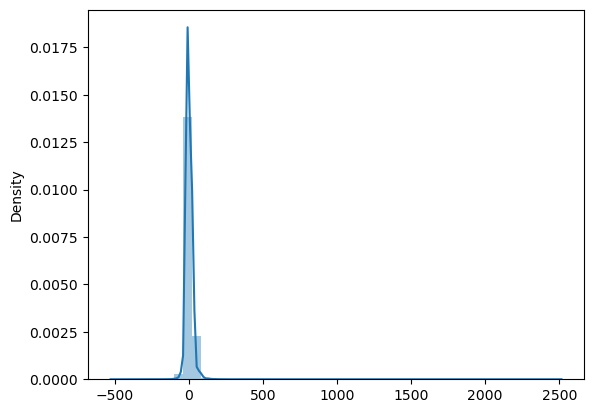

In [122]:
sns.distplot(res_train, kde = True)

In [123]:
res_test = y_test - y_predict_test

In [124]:
res_test

array([[ -3.079825  ],
       [ -9.46520797],
       [ 16.18686863],
       ...,
       [-20.82990588],
       [ -2.41936115],
       [ -3.60897819]])

<Axes: ylabel='Density'>

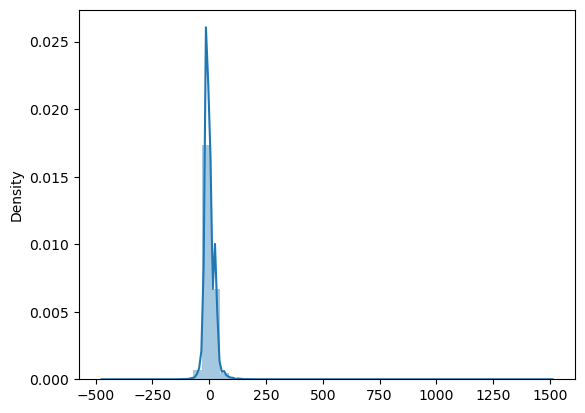

In [125]:
sns.distplot(res_test, kde = True)